In [4]:
import numpy as np
import pandas as pd

import os


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv('/content/yield_df.csv')

In [ ]:
df.sample(15)


,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
8510,8510,El Salvador,Sorghum,2004,15999,1784.0,2078.01,26.20
9587,9587,Guatemala,Sorghum,2002,14004,1996.0,10381.71,19.93
26687,26687,Turkey,"Rice, paddy",1996,51114,593.0,30286.00,11.92
774,774,Armenia,Wheat,2001,22263,562.0,79.31,10.18
18007,18007,Lithuania,Maize,1996,14201,656.0,979.00,5.09
4524,4524,Brazil,Cassava,2011,146230,1761.0,345026.00,18.01
1916,1916,Azerbaijan,Wheat,1999,19992,447.0,148.68,12.74
26358,26358,Thailand,Cassava,1999,154929,1622.0,22761.00,27.34
23557,23557,Poland,Wheat,2002,38539,600.0,10358.00,9.14
2706,2706,Brazil,Soybeans,1991,15533,1761.0,58349.44,25.06


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [ ]:

df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df.columns


Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [ ]:
len(df)


28242

In [ ]:
df.duplicated().sum()


np.int64(2310)

In [ ]:
df.drop_duplicates(inplace = True)


In [ ]:
len(df)


25932

In [ ]:
df.describe()


,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [ ]:
df.drop(columns=['Area','Item']).corr()


,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Year,1.000000,0.091327,-0.006423,0.135127,0.013701
hg/ha_yield,0.091327,1.000000,-0.004067,0.065523,-0.110400
average_rain_fall_mm_per_year,-0.006423,-0.004067,1.000000,0.161483,0.333694
pesticides_tonnes,0.135127,0.065523,0.161483,1.000000,0.045577
avg_temp,0.013701,-0.110400,0.333694,0.045577,1.000000


In [ ]:
df['average_rain_fall_mm_per_year'].dtypes

dtype('float64')

In [ ]:

def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True

In [ ]:
print(isStr("Hello"))


True


In [ ]:

print(isStr("123"))


False


In [ ]:
df['average_rain_fall_mm_per_year'].sample(10)


,average_rain_fall_mm_per_year
20832,1032.0
12499,1083.0
21880,494.0
10628,1083.0
18089,1513.0
15120,2702.0
697,591.0
26610,593.0
10574,1083.0
17706,661.0


In [ ]:
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

to_drop


Index([], dtype='int64')

In [ ]:
df = df.drop(to_drop)

df


,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [ ]:
df['Area'].value_counts()


,count
Area,
India,3384
Brazil,1854
Mexico,1280
Australia,966
Pakistan,966
...,...
Latvia,42
Belgium,39
Bahrain,29


<Axes: xlabel='count', ylabel='Area'>

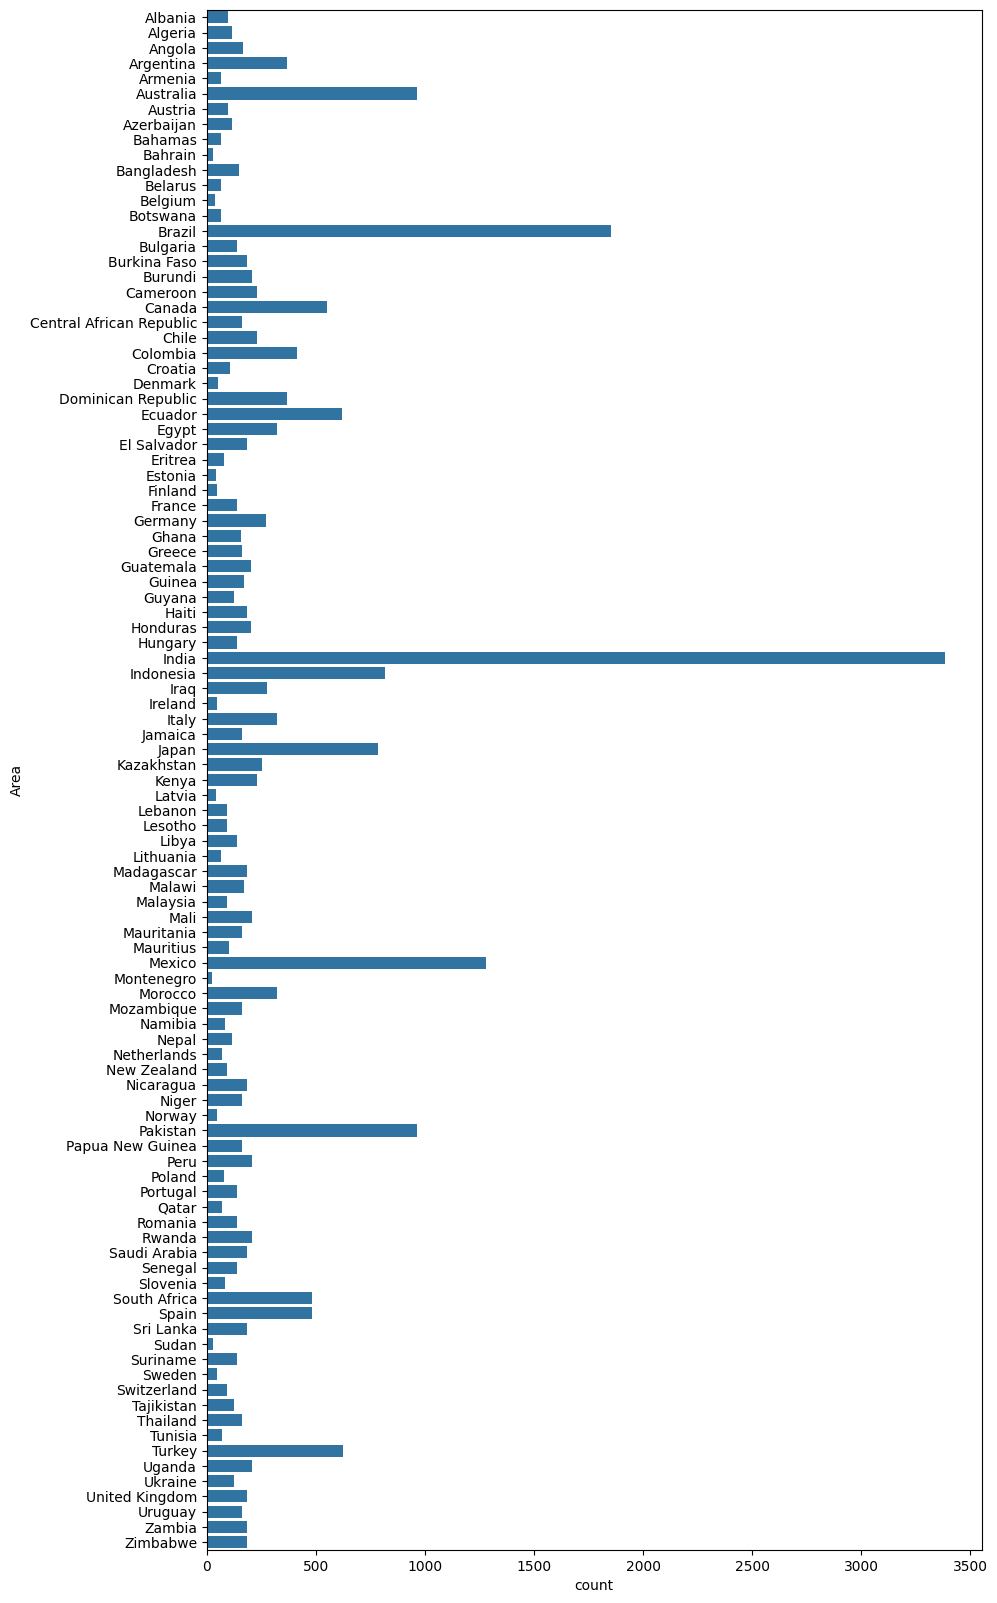

In [ ]:
plt.figure(figsize=(10,20))
sns.countplot(y=df['Area'])


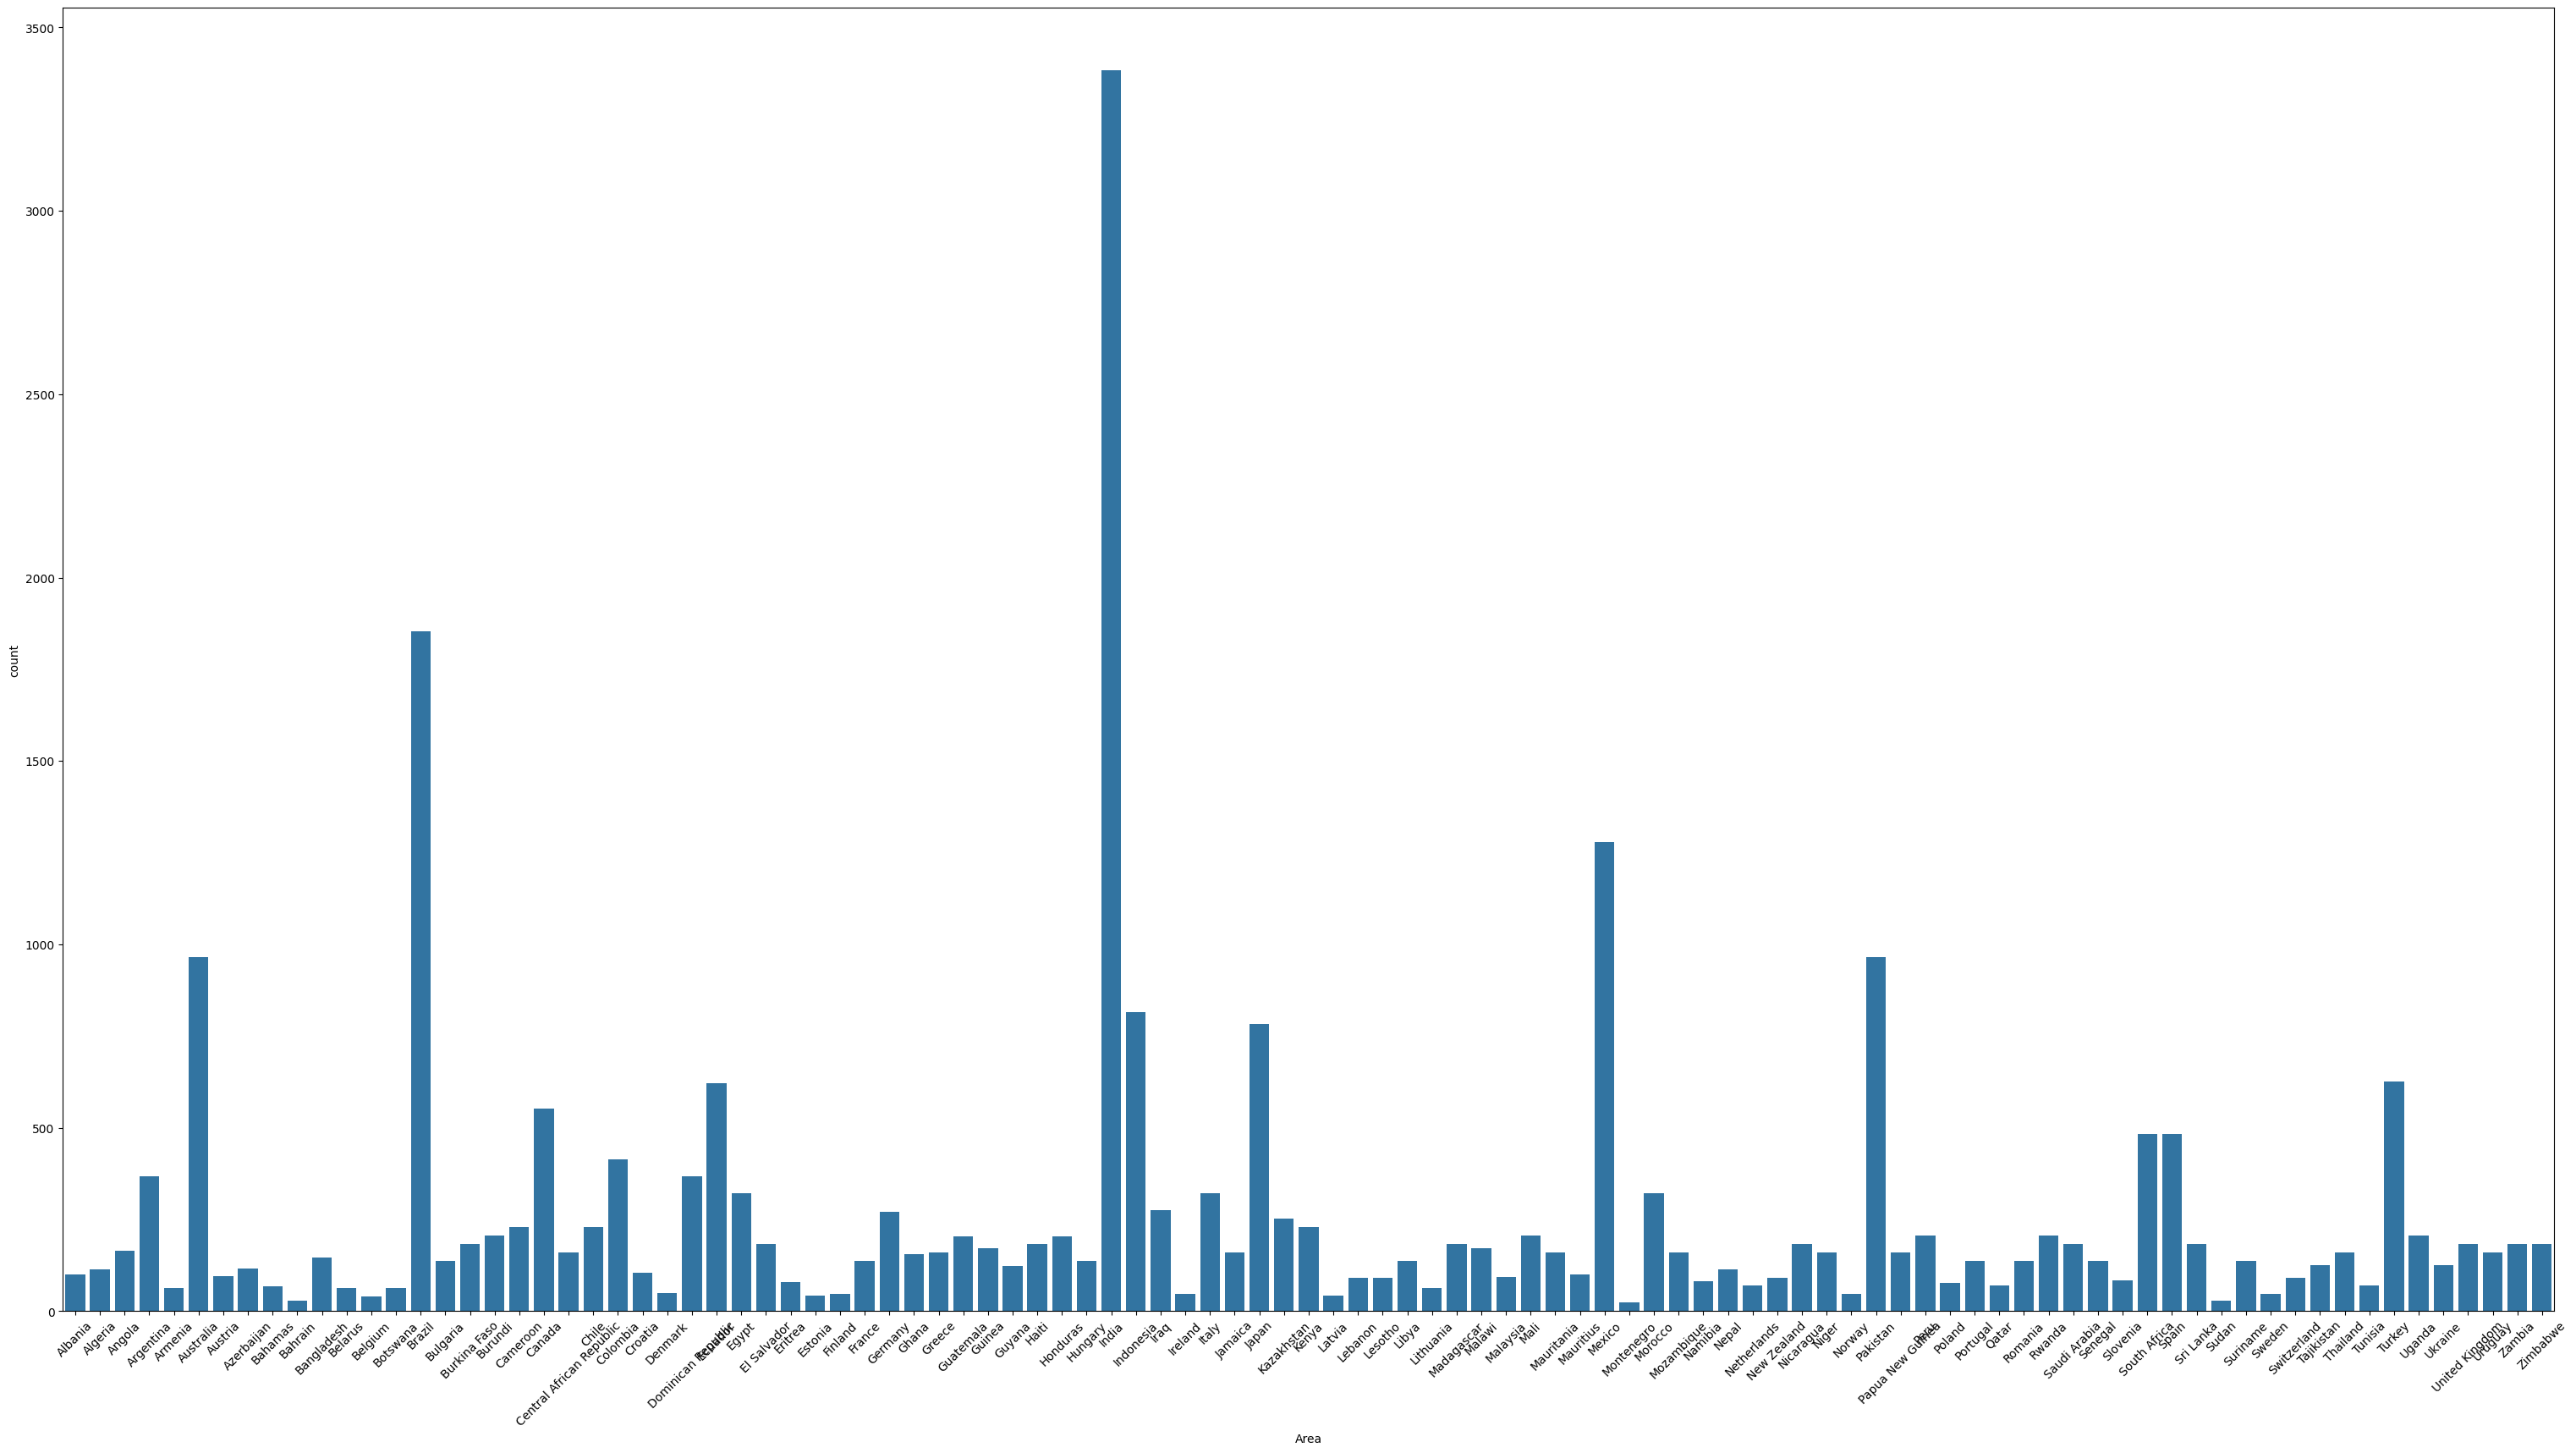

In [ ]:
plt.figure(figsize=(38,20))
sns.countplot(x = df['Area'])
plt.xticks(rotation=45)
plt.show()


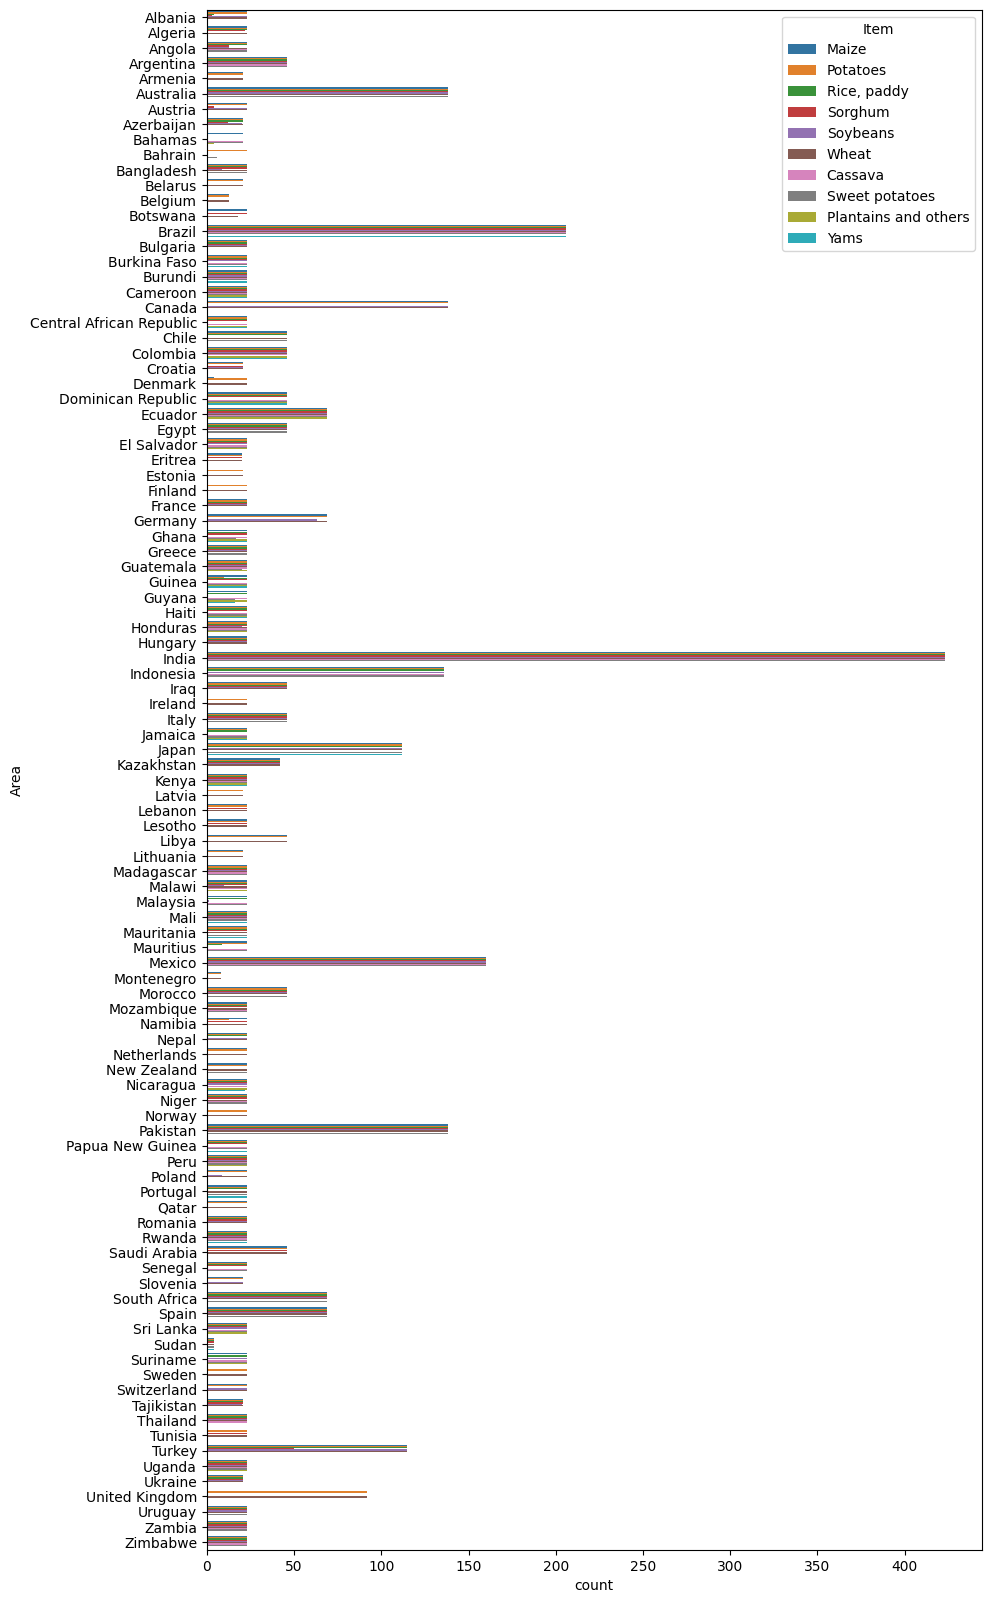

In [ ]:

plt.figure(figsize=(10,20))
sns.countplot(y = df['Area'],hue=df['Item'])
plt.show()

In [ ]:
yield_per_country = df.groupby('Area')['hg/ha_yield'].mean()

yield_per_country.sample(10)

,hg/ha_yield
Area,
Tajikistan,50361.680000
Kazakhstan,39544.492063
Finland,135014.521739
Lithuania,66259.492063
Mauritania,27738.142857
Latvia,88061.619048
United Kingdom,240956.478261
Azerbaijan,39727.413793
Argentina,89304.434783


<Axes: xlabel='Area'>

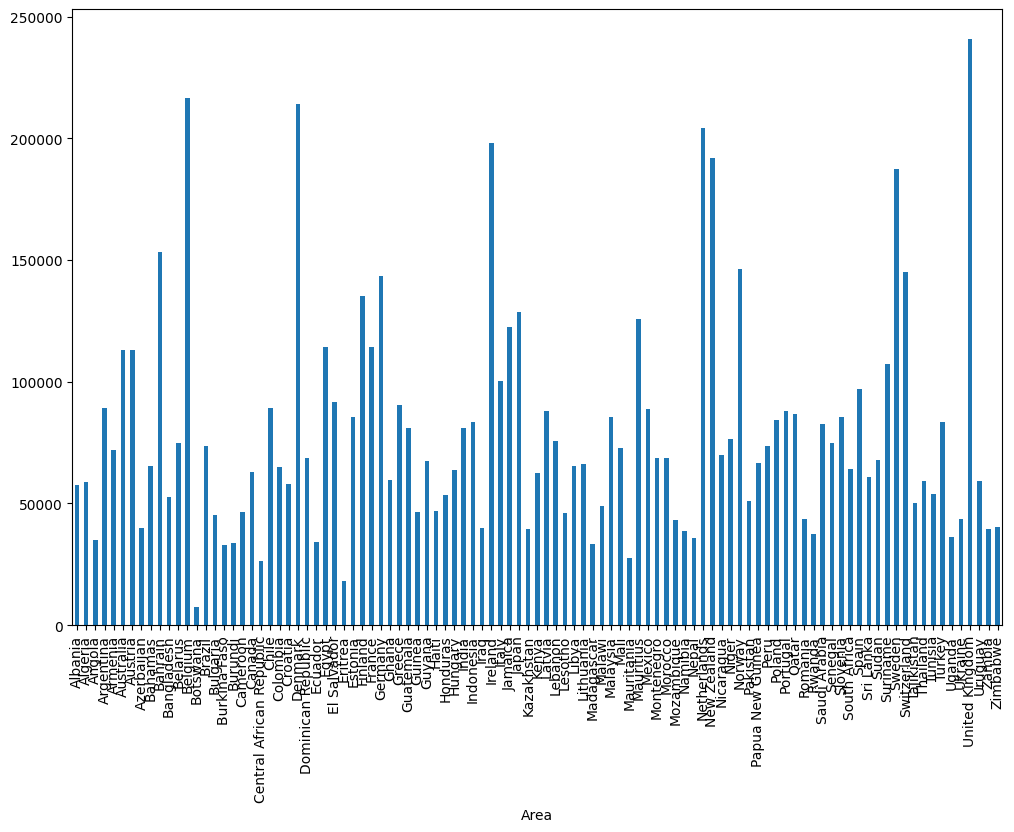

In [ ]:
plt.figure(figsize=(12,8))
yield_per_country.plot(kind='bar')

In [ ]:
countries = df['Area'].unique()

In [ ]:
yield_country = []
for country in countries:
    yield_country.append(df[df['Area']==country]['hg/ha_yield'].sum())

In [ ]:
yield_country


[np.int64(5711536),
 np.int64(6711464),
 np.int64(5722563),
 np.int64(32864032),
 np.int64(4524100),
 np.int64(109111062),
 np.int64(10852258),
 np.int64(4608380),
 np.int64(4384717),
 np.int64(4443889),
 np.int64(7720159),
 np.int64(4704812),
 np.int64(8442270),
 np.int64(470651),
 np.int64(136340329),
 np.int64(6263075),
 np.int64(6083337),
 np.int64(7031146),
 np.int64(10717883),
 np.int64(34706922),
 np.int64(4255627),
 np.int64(20561214),
 np.int64(26927138),
 np.int64(6083167),
 np.int64(10701651),
 np.int64(25312166),
 np.int64(21315591),
 np.int64(36828848),
 np.int64(16855944),
 np.int64(1452416),
 np.int64(3595638),
 np.int64(6210668),
 np.int64(15790618),
 np.int64(38780463),
 np.int64(9260371),
 np.int64(14571925),
 np.int64(16508723),
 np.int64(7975743),
 np.int64(8361103),
 np.int64(8619194),
 np.int64(10920131),
 np.int64(8824110),
 np.int64(274219558),
 np.int64(68067328),
 np.int64(10984722),
 np.int64(9104030),
 np.int64(32280700),
 np.int64(19698007),
 np.int64(10092

In [ ]:
i = 0
for country in countries:
    print(f"{country}:{yield_country[i]}")
    i+=1

Albania:5711536
Algeria:6711464
Angola:5722563
Argentina:32864032
Armenia:4524100
Australia:109111062
Austria:10852258
Azerbaijan:4608380
Bahamas:4384717
Bahrain:4443889
Bangladesh:7720159
Belarus:4704812
Belgium:8442270
Botswana:470651
Brazil:136340329
Bulgaria:6263075
Burkina Faso:6083337
Burundi:7031146
Cameroon:10717883
Canada:34706922
Central African Republic:4255627
Chile:20561214
Colombia:26927138
Croatia:6083167
Denmark:10701651
Dominican Republic:25312166
Ecuador:21315591
Egypt:36828848
El Salvador:16855944
Eritrea:1452416
Estonia:3595638
Finland:6210668
France:15790618
Germany:38780463
Ghana:9260371
Greece:14571925
Guatemala:16508723
Guinea:7975743
Guyana:8361103
Haiti:8619194
Honduras:10920131
Hungary:8824110
India:274219558
Indonesia:68067328
Iraq:10984722
Ireland:9104030
Italy:32280700
Jamaica:19698007
Japan:100924145
Kazakhstan:9965212
Kenya:14391737
Latvia:3698588
Lebanon:6956804
Lesotho:4258932
Libya:9016288
Lithuania:4174348
Madagascar:6103523
Malawi:8346715
Malaysia:7

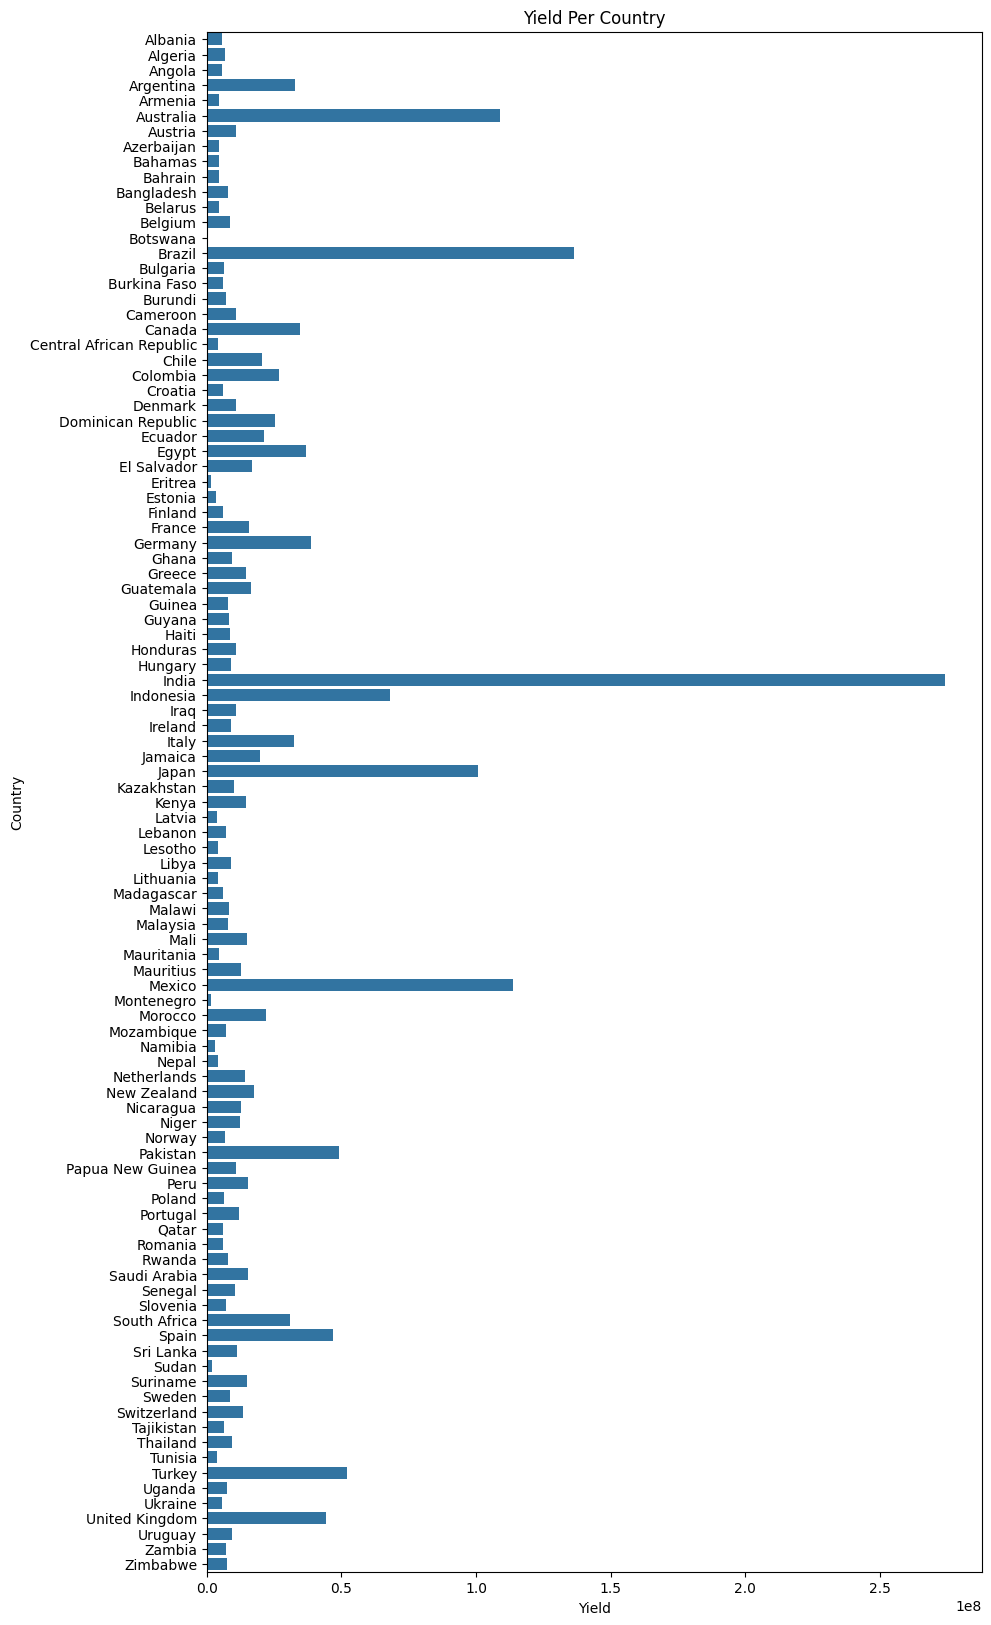

In [ ]:
plt.figure(figsize=[10,20])
sns.barplot(y=countries,x=yield_country)
plt.xlabel('Yield')
plt.ylabel('Country')
plt.title('Yield Per Country')
plt.show()

In [ ]:
crop = df['Item'].unique()

crop

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

<Axes: xlabel='count', ylabel='Item'>

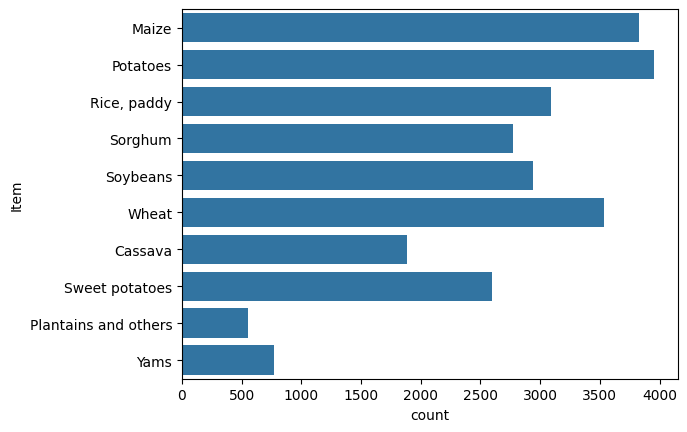

In [ ]:
sns.countplot(y= df['Item'])


In [ ]:
df.head()


,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
yield_per_item = []

for item in crop:
    yield_per_item.append(df[df['Item'] == item]['hg/ha_yield'].sum())

In [ ]:
i = 0
for item in crop:
    print(f'{item} : {yield_per_item[i]}')
    i+=1

Maize : 142020761
Potatoes : 785921609
Rice, paddy : 127646024
Sorghum : 52906376
Soybeans : 49957039
Wheat : 106614786
Cassava : 275132269
Sweet potatoes : 310269345
Plantains and others : 58958974
Yams : 86769760


In [ ]:

for i, item in enumerate(crop):
    print(f'{item} : {yield_per_item[i]}')

Maize : 142020761
Potatoes : 785921609
Rice, paddy : 127646024
Sorghum : 52906376
Soybeans : 49957039
Wheat : 106614786
Cassava : 275132269
Sweet potatoes : 310269345
Plantains and others : 58958974
Yams : 86769760


<Axes: >

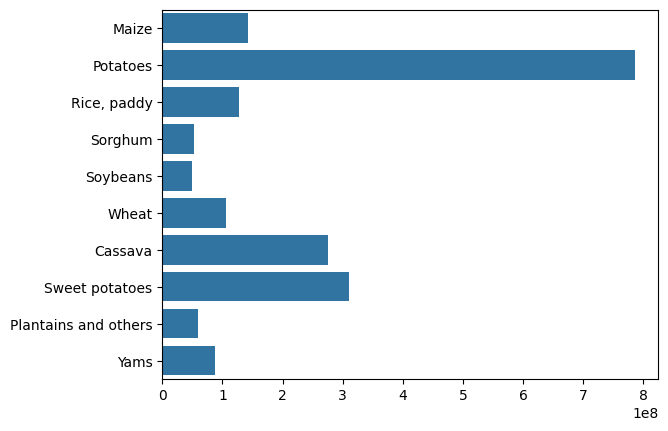

In [ ]:
sns.barplot(y=crop,x=yield_per_item,errorbar="sd")


In [ ]:
df.head()


,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.0,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.0,16.37,Albania,Soybeans,7000


In [ ]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp' ,'Area' ,'Item' , 'hg/ha_yield']
df = df[col]
df.head()

In [ ]:
x = df.drop(columns='hg/ha_yield')

y = df['hg/ha_yield']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

from sklearn.compose import ColumnTransformer

In [ ]:
one = OneHotEncoder(drop='first')

scaler = StandardScaler()

In [ ]:
preprocessor = ColumnTransformer(
       transformers = [
           ('onehotencoder',one,[4,5]),
           ('standrization',scaler,[0,1,2,3])
       ],
       remainder = 'passthrough'
)

In [ ]:
preprocessor


ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(drop='first'),
                                 [4, 5]),
                                ('standrization', StandardScaler(),
                                 [0, 1, 2, 3])])

In [ ]:
x_train_dummy = preprocessor.fit_transform(x_train)
x_test_dummy = preprocessor.transform(x_test)

In [ ]:
x_test_dummy


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 30739 stored elements and shape (5187, 113)>

In [ ]:
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = {

    'knn': KNeighborsRegressor(n_neighbors=5, algorithm='brute', n_jobs=-1),
    'Dt' : DecisionTreeRegressor(),
    'Rf' : RandomForestRegressor(),
    'Br' : BaggingRegressor()

}

In [ ]:
for name, mod in model.items():
    mod.fit(x_train_dummy, y_train)
    y_pred = mod.predict(x_test_dummy)
    print(f'{name} MSE: {mean_squared_error(y_test, y_pred)} Score: {r2_score(y_test, y_pred)}')


knn MSE: 108093458.03490265 Score: 0.9849704427352223
Dt MSE: 142877322.2745325 Score: 0.980134016100495
Rf MSE: 88074618.9675226 Score: 0.9877539070965937
Br MSE: 104759928.5004897 Score: 0.9854339441713138


In [ ]:
x = preprocessor.transform(df.drop(columns=['hg/ha_yield']))


In [ ]:
rf = RandomForestRegressor(random_state=0, n_jobs=-1)
rf.fit(x_train_dummy, y_train)
rf.score(x_test_dummy, y_test)


0.9878737511310188

In [ ]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    feature = pd.DataFrame([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]],
                           columns=['Year','average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp','Area','Item'])

    feature = preprocessor.transform(feature)
    pred = rf.predict(feature)
    return pred[0]


In [ ]:
Year = 2023
average_rain_fall_mm_per_year = 500
pesticides_tonnes = 200
avg_temp = 23.87
Area = 'India'
Item = 'Wheat'

result = prediction(Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item)

In [ ]:
result

np.float64(20983.15)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

results = []

for name, mod in model.items():
    mod.fit(x_train_dummy, y_train)
    y_pred = mod.predict(x_test_dummy)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append([name, mae, mse, rmse, r2])

df_results = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R2 Score"])
df_results.sort_values(by="R2 Score", ascending=False)


,Model,MAE,MSE,RMSE,R2 Score
2,Rf,3724.907174,9.117071e+07,9548.335710,0.987323
3,Br,3990.251417,9.680531e+07,9838.968702,0.986540
0,knn,4611.269096,1.080935e+08,10396.800375,0.984970
1,Dt,3885.342202,1.457706e+08,12073.550948,0.979732
